# PISA Data Exploration
## by In-A Park

## Preliminary Wrangling

> This document explores a dataset containing how prepared student's compulsory education system for life beyond school

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
file = 'pisa2012.csv'
df = pd.read_csv(file, encoding='ISO-8859-1', low_memory=False, index_col=0)

In [3]:
df.head()

,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
1,Albania,80000,ALB0006,Non-OECD,Albania,1,1,10,1.0,2,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
2,Albania,80000,ALB0006,Non-OECD,Albania,1,2,10,1.0,2,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
3,Albania,80000,ALB0006,Non-OECD,Albania,1,3,9,1.0,9,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
4,Albania,80000,ALB0006,Non-OECD,Albania,1,4,9,1.0,8,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
5,Albania,80000,ALB0006,Non-OECD,Albania,1,5,9,1.0,10,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485490 entries, 1 to 485490
Columns: 635 entries, CNT to VER_STU
dtypes: float64(250), int64(17), object(368)
memory usage: 2.3+ GB


# Questions

I want to answer these questions

### Korea vs Finland
>1. What type of math anxiety do they feel the most?<br/>
>2. How much do they feel anxious overall about math?<br/>
>3. How did they attribute to failure in math test?<br/>
>4. Which country get the high math score?<br>
>5. How did math anxiety affect math test?<br/>

# Data Wrangling

In [5]:
# Copy the raw dataset before cleaning

clean_df = df.copy()

In [6]:
# Select the some of the columns that we're going to use to answer these questions

clean_df = clean_df[['ST42Q01', 'ST42Q03', 'ST42Q05', 'ST42Q08', 'ST42Q10','ST44Q01', 'ST44Q03', 'ST44Q04', 'ST44Q05', 'ST44Q07', 'ST44Q08','PV1MATH','CNT']]

clean_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 485490 entries, 1 to 485490
Data columns (total 13 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   ST42Q01  313855 non-null  object 
 1   ST42Q03  312176 non-null  object 
 2   ST42Q05  312624 non-null  object 
 3   ST42Q08  312456 non-null  object 
 4   ST42Q10  312853 non-null  object 
 5   ST44Q01  314119 non-null  object 
 6   ST44Q03  313405 non-null  object 
 7   ST44Q04  312645 non-null  object 
 8   ST44Q05  312996 non-null  object 
 9   ST44Q07  312970 non-null  object 
 10  ST44Q08  313374 non-null  object 
 11  PV1MATH  485490 non-null  float64
 12  CNT      485490 non-null  object 
dtypes: float64(1), object(12)
memory usage: 51.9+ MB


In [7]:
# We only need Korea and Finland

clean_df = clean_df[(clean_df['CNT'] == 'Korea') | (clean_df['CNT'] == 'Finland')]

In [8]:
# Rename the column
# Math Anxiety
clean_df.rename(columns = {'ST42Q01' : 'MA_1', 'ST42Q03' : 'MA_2', 'ST42Q05' : 'MA_3', 'ST42Q08' : 'MA_4', 'ST42Q10' : 'MA_5'}, inplace = True)

In [9]:
# Attribution to Failure
clean_df.rename(columns = {'ST44Q01' : 'AF_1','ST44Q03' : 'AF_2','ST44Q04' : 'AF_3','ST44Q05': 'AF_4','ST44Q07':'AF_5','ST44Q08':'AF_6'}, inplace = True)

In [10]:
# Math score
clean_df.rename(columns = {'PV1MATH' : 'Score'}, inplace = True)

In [11]:
# CNT
clean_df.rename(columns = {'CNT' : 'Country'}, inplace = True)

In [12]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13862 entries, 175676 to 295893
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MA_1     9033 non-null   object 
 1   MA_2     9022 non-null   object 
 2   MA_3     9019 non-null   object 
 3   MA_4     9018 non-null   object 
 4   MA_5     9022 non-null   object 
 5   AF_1     9076 non-null   object 
 6   AF_2     9066 non-null   object 
 7   AF_3     9047 non-null   object 
 8   AF_4     9054 non-null   object 
 9   AF_5     9051 non-null   object 
 10  AF_6     9067 non-null   object 
 11  Score    13862 non-null  float64
 12  Country  13862 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.5+ MB


In [13]:
# nan : mean of data
# Disagree : 0
# Strongly disagree : 0
# Agree : 1
# Strongly agree : 2

clean_df['MA_1'].unique()

array(['Agree', nan, 'Disagree', 'Strongly disagree', 'Strongly agree'],
      dtype=object)

In [14]:
def result(x):
    if x == 'Disagree':
        return 0
    elif x == 'Strong disagree':
        return 0
    elif x == 'Agree':
        return 1
    elif x == 'Strongly agree':
        return 2
    else : 
        pass 

In [15]:
clean_df['MA_1'] = clean_df['MA_1'].apply(result)

In [16]:
# handle the Nan value

clean_df['MA_1'].unique()

array([ 1., nan,  0.,  2.])

In [17]:
clean_df['MA_1'] = clean_df['MA_1'].fillna(clean_df['MA_1'].mean())

In [18]:
clean_df['MA_1'].unique()

array([1.        , 0.88734455, 0.        , 2.        ])

In [19]:
# MA_2

clean_df['MA_2'] = clean_df['MA_2'].apply(result)
clean_df['MA_2'] = clean_df['MA_2'].fillna(clean_df['MA_2'].mean())

In [20]:
# MA_3

clean_df['MA_3'] = clean_df['MA_3'].apply(result)
clean_df['MA_3'] = clean_df['MA_3'].fillna(clean_df['MA_3'].mean())

In [21]:
# MA_4

clean_df['MA_4'] = clean_df['MA_4'].apply(result)
clean_df['MA_4'] = clean_df['MA_4'].fillna(clean_df['MA_4'].mean())

In [22]:
# MA_5

clean_df['MA_5'] = clean_df['MA_5'].apply(result)
clean_df['MA_5'] = clean_df['MA_5'].fillna(clean_df['MA_5'].mean())

In [23]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13862 entries, 175676 to 295893
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MA_1     13862 non-null  float64
 1   MA_2     13862 non-null  float64
 2   MA_3     13862 non-null  float64
 3   MA_4     13862 non-null  float64
 4   MA_5     13862 non-null  float64
 5   AF_1     9076 non-null   object 
 6   AF_2     9066 non-null   object 
 7   AF_3     9047 non-null   object 
 8   AF_4     9054 non-null   object 
 9   AF_5     9051 non-null   object 
 10  AF_6     9067 non-null   object 
 11  Score    13862 non-null  float64
 12  Country  13862 non-null  object 
dtypes: float64(6), object(7)
memory usage: 1.5+ MB


In [24]:
# Creat the new column : 'Anxiety'

clean_df['Anxiety'] = clean_df['MA_1'] + clean_df['MA_2'] + clean_df['MA_3'] + clean_df['MA_4'] + clean_df['MA_5']

In [25]:
# AF_1

# Not at all likely : 0
# Slightly likely : 1
# Likely : 2
# Very Likely : 3

clean_df['AF_1'].unique()

array(['Likely', nan, 'Slightly likely', 'Very   Likely',
       'Not at all likely'], dtype=object)

In [26]:
def result(x):
    if x == 'Not at all likely':
        return 0
    elif x == 'Slightly likely':
        return 1
    elif x == 'Likely':
        return 2
    elif x == 'Very Likely':
        return 3
    else : 
        pass 

In [27]:
clean_df['AF_1'] = clean_df['AF_1'].apply(result)

In [28]:
clean_df['AF_1'].unique()

array([ 2., nan,  1.,  0.])

In [29]:
clean_df['AF_1'] = clean_df['AF_1'].fillna(clean_df['AF_1'].mean())

In [30]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13862 entries, 175676 to 295893
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MA_1     13862 non-null  float64
 1   MA_2     13862 non-null  float64
 2   MA_3     13862 non-null  float64
 3   MA_4     13862 non-null  float64
 4   MA_5     13862 non-null  float64
 5   AF_1     13862 non-null  float64
 6   AF_2     9066 non-null   object 
 7   AF_3     9047 non-null   object 
 8   AF_4     9054 non-null   object 
 9   AF_5     9051 non-null   object 
 10  AF_6     9067 non-null   object 
 11  Score    13862 non-null  float64
 12  Country  13862 non-null  object 
 13  Anxiety  13862 non-null  float64
dtypes: float64(8), object(6)
memory usage: 1.6+ MB


In [31]:
# AF_2

clean_df['AF_2'] = clean_df['AF_2'].apply(result)
clean_df['AF_2'] = clean_df['AF_2'].fillna(clean_df['AF_2'].mean())

In [32]:
# AF_3

clean_df['AF_3'] = clean_df['AF_3'].apply(result)
clean_df['AF_3'] = clean_df['AF_3'].fillna(clean_df['AF_3'].mean())

In [33]:
# AF_4

clean_df['AF_4'] = clean_df['AF_4'].apply(result)
clean_df['AF_4'] = clean_df['AF_4'].fillna(clean_df['AF_4'].mean())

In [34]:
# AF_5

clean_df['AF_5'] = clean_df['AF_5'].apply(result)
clean_df['AF_5'] = clean_df['AF_5'].fillna(clean_df['AF_5'].mean())

In [35]:
# AF_6

clean_df['AF_6'] = clean_df['AF_6'].apply(result)
clean_df['AF_6'] = clean_df['AF_6'].fillna(clean_df['AF_6'].mean())

## Final dataframe

In [36]:
clean_df.sample(5)

,MA_1,MA_2,MA_3,MA_4,MA_5,AF_1,AF_2,AF_3,AF_4,AF_5,AF_6,Score,Country,Anxiety
184320,0.887345,0.37226,0.460913,0.5368,1.009916,2.00000,2.000000,1.000000,1.000000,1.254141,1.099649,320.7743,Finland,3.267234
179700,0.887345,0.37226,0.460913,0.5368,1.009916,1.32181,1.089151,1.036564,1.454558,1.254141,1.099649,608.8254,Finland,3.267234
291457,2.000000,2.00000,2.000000,2.0000,2.000000,1.32181,1.089151,1.036564,1.454558,1.254141,1.099649,641.2292,Korea,10.000000
181977,1.000000,0.00000,0.000000,0.0000,2.000000,2.00000,1.089151,2.000000,1.000000,1.000000,1.000000,537.6305,Finland,3.000000
294463,0.887345,0.37226,0.460913,0.5368,1.009916,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000,520.4160,Korea,3.267234


### Math Anxiety
MA_1 : Worry that math will be difficult<br/>
MA_2 : Get very Tense<br/>
MA_3 : Get very Nervous<br/>
MA_4 : Feel Helpless<br/>
MA_5 : Worry about getting poor grades
### Attributions to Failure
AF_1 : I'm not good at math<br/>
AF_2 : Teacher did not explain well<br/>
AF_3 : Bad guesses<br/>
AF_4 : Material Too Hard<br/>
AF_5 : Teacher didn't get students Interested<br/>
AF_6 : Unlucky

## Univariate Exploration

In [37]:
# The number of student each of Country

# Korea

print(len(clean_df.query("Country == 'Korea'")))

# Finland

print(len(clean_df.query("Country == 'Finland'")))

5033
8829


In [38]:
# Math Anxiety

df_1 = clean_df[['MA_1','MA_2','MA_3','MA_4','MA_5']].mean()

# Distribution of Math anxiety

MA_1 : Worry that math will be difficult<br/>
MA_2 : Get very Tense<br/>
MA_3 : Get very Nervous<br/>
MA_4 : Feel Helpless<br/>
MA_5 : Worry about getting poor grades

According to this barplot, most of student feel worry about their poor math grade(MA_5)

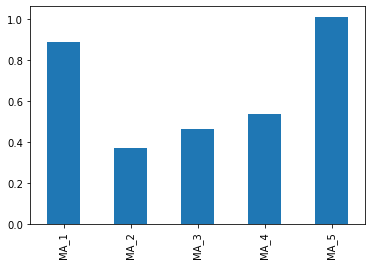

In [39]:
df_1.plot(kind = 'bar')

# Attributions to Failure

AF_1 : I'm not good at math<br/>
AF_2 : Teacher did not explain well<br/>
AF_3 : Bad guesses<br/>
AF_4 : Material Too Hard<br/>
AF_5 : Teacher didn't get students Interested<br/>
AF_6 : Unlucky

Most student think the math material is hard and they think they don't good at math


In [40]:
# Attributions to Failure

In [41]:
df_2 = clean_df[['AF_1','AF_2','AF_3','AF_4','AF_5','AF_6']].mean()

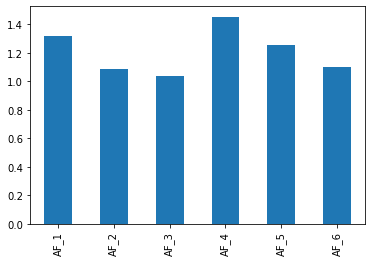

In [42]:
df_2.plot(kind = 'bar')

# Distribution of Math Score

The math score seem to be normally distributed

In [45]:
# distribution of math score

clean_df['Score'].mean()

524.4825157697304

(array([4.000e+00, 5.800e+01, 4.260e+02, 1.597e+03, 3.558e+03, 4.245e+03,
        2.848e+03, 9.920e+02, 1.250e+02, 9.000e+00]),
 array([113.1095 , 190.93315, 268.7568 , 346.58045, 424.4041 , 502.22775,
        580.0514 , 657.87505, 735.6987 , 813.52235, 891.346  ]),
 <a list of 10 Patch objects>)

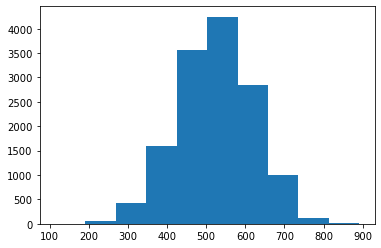

In [46]:
plt.hist(clean_df['Score'])

According to this univariate exploration, I came to know what type of math anxeity do they have most. In terms of attribute to failure, we can see which type of attribution are the most appeared in this dataset. Lastly we can see the distribution of the math score.

## Bivariate Exploration

In [132]:
clean_df.head()

,MA_1,MA_2,MA_3,MA_4,MA_5,AF_1,AF_2,AF_3,AF_4,AF_5,AF_6,Score,Country,Anxiety
175676,1.0,0.00000,0.000000,0.0000,1.0,2.00000,2.000000,0.000000,2.000000,2.000000,0.000000,520.5717,Finland,2.000000
175677,1.0,0.37226,1.000000,0.0000,2.0,1.32181,1.089151,2.000000,2.000000,2.000000,1.099649,427.8003,Finland,4.372260
175678,1.0,0.00000,0.000000,0.0000,1.0,1.32181,1.089151,1.036564,1.454558,1.254141,1.099649,207.0494,Finland,2.000000
175679,1.0,0.37226,0.460913,0.5368,2.0,1.32181,1.089151,1.036564,1.454558,1.254141,1.099649,559.4407,Finland,4.369974
175680,1.0,1.00000,0.000000,0.0000,0.0,1.32181,1.089151,1.036564,1.454558,1.254141,1.099649,432.6297,Finland,2.000000


In [173]:
# Comparison : Korea VS Finland Type of Anxiety

country_mean = clean_df.groupby('Country')[['MA_1','MA_2','MA_3','MA_4','MA_5']].mean()

In [174]:
country_mean

,MA_1,MA_2,MA_3,MA_4,MA_5
Country,,,,,
Finland,0.823301,0.332861,0.408016,0.502353,0.914454
Korea,0.999691,0.441375,0.553707,0.597229,1.177378


In [177]:
country_mean = country_mean.transpose()

In [179]:
country_mean

Country,Finland,Korea
MA_1,0.823301,0.999691
MA_2,0.332861,0.441375
MA_3,0.408016,0.553707
MA_4,0.502353,0.597229
MA_5,0.914454,1.177378


# Korea VS Finland : Math Anxiety

According to this graph, overall the student living in Korea more feel anxiety about math than Finland

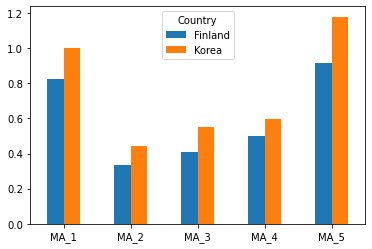

In [182]:
country_mean.plot.bar(rot=0)

In [184]:
# Comparison : Korea VS Finland Type of attribution

country_att = clean_df.groupby('Country')[['AF_1','AF_2','AF_3','AF_4','AF_5','AF_6']].mean()

In [186]:
att_mean = country_att.transpose()

# Korea VS Finland : Attributions to failure

Both of country tend to attribute to their failure to the material that they used.

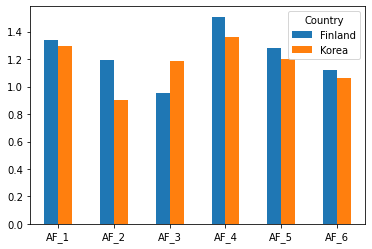

In [187]:
att_mean.plot.bar(rot=0)

In [188]:
# Comparison : Korea VS Finland Math Score

clean_df.groupby('Country')['Score'].mean()

Country
Finland    507.525776
Korea      554.228404
Name: Score, dtype: float64

In this process, I want to strss the difference between Korea and Finland. First, I discovered that Korean student tend to feel more anxiety about math than the Finland student. Second, both of two countries think that theire material so bad that they could get bad score in math

## Multivariate Exploration

According to the heat map, we don't really see any correlationship between variables

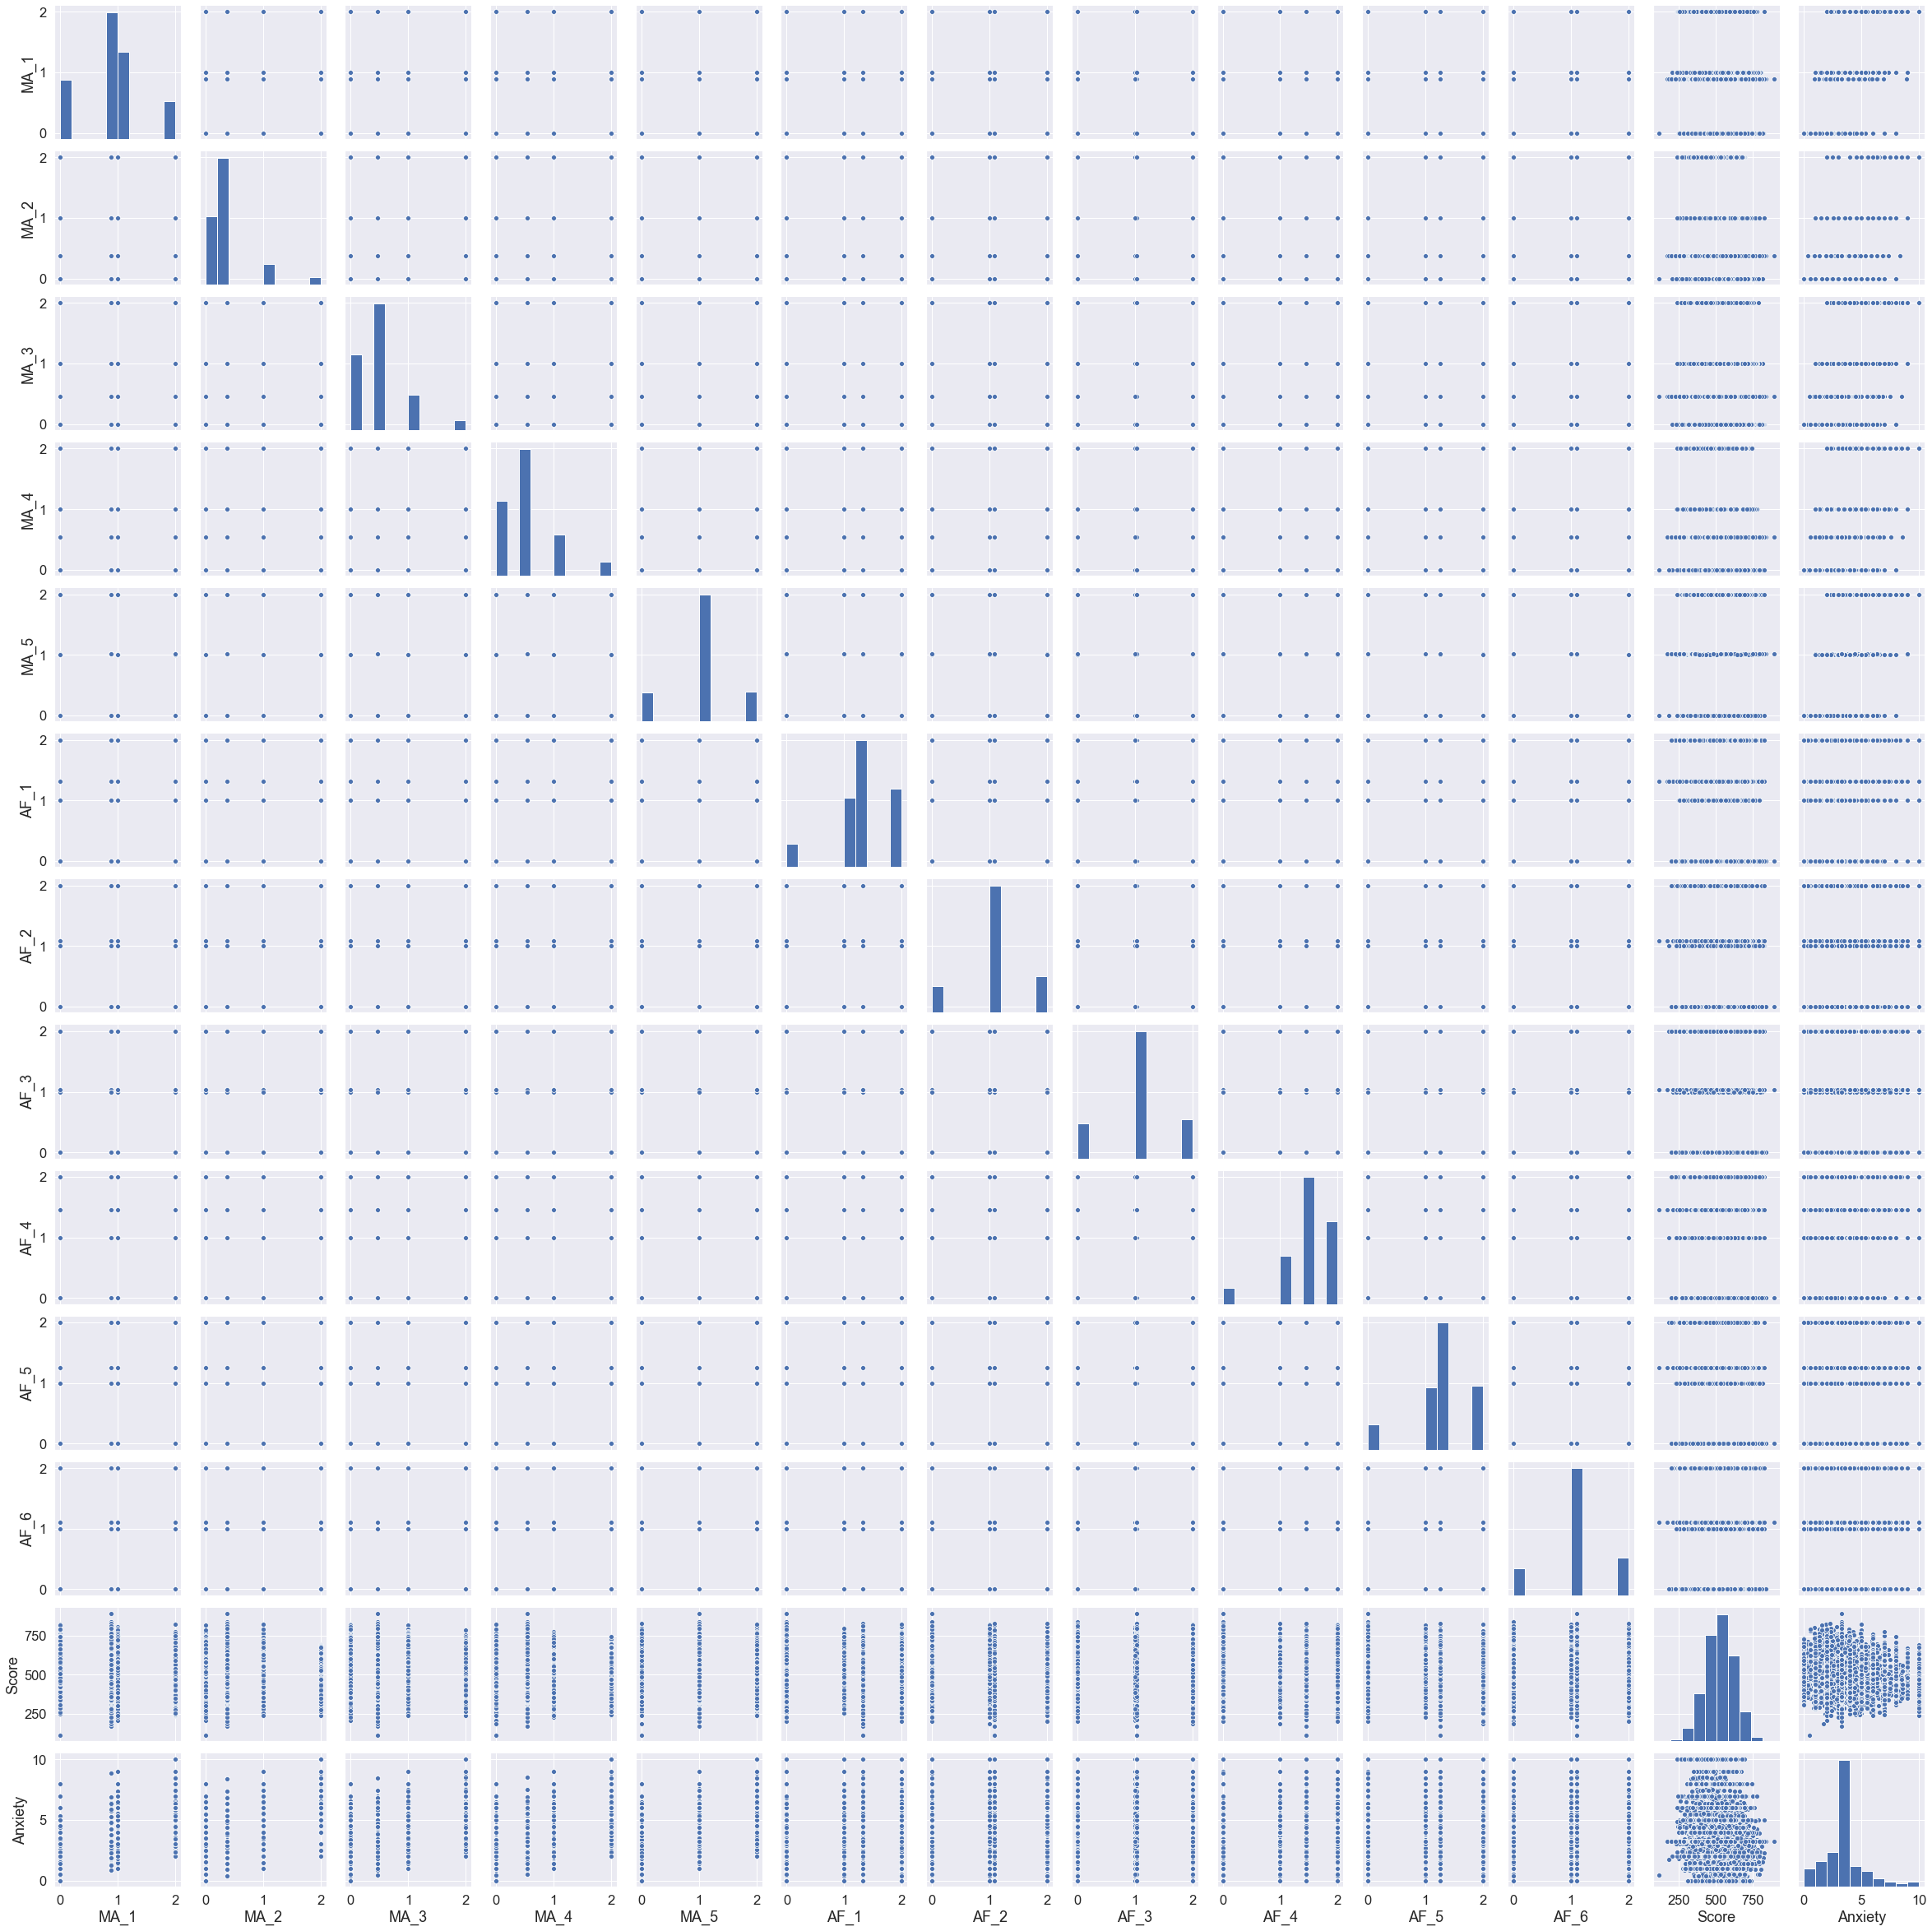

In [255]:
import seaborn as sns
sns.pairplot(clean_df)

# Conclusion
Finally we can answer to these questions below.

### Korea vs Finland
>1. What type of math anxiety do they feel the most?<br/>
There are different types of anxiety that they have, but they feel worry about getting a poor grade in math test
>2. How did they attribute to failure in math test?<br/>
Both of country tend to attribute their failure to the education material that they had
>3. Which country get the high math score?<br>
Korean student get the more high score than the Finland student
>4. How did math anxiety affect math test?<br/>
There is no clear relationship between variable, which I didn't expect